In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Preview data
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
products.head()


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
# Cleaning and preprocessing 
# Checking missing value 
print(customers.isnull().sum().sum())
print(products.isnull().sum().sum())
print(transactions.isnull().sum().sum())

0
0
0


In [7]:
# Duplicate
print(customers[customers.duplicated()])
print(products[products.duplicated()])
print(transactions[transactions.duplicated()])

Empty DataFrame
Columns: [CustomerID, CustomerName, Region, SignupDate]
Index: []
Empty DataFrame
Columns: [ProductID, ProductName, Category, Price]
Index: []
Empty DataFrame
Columns: [TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price]
Index: []


### EDA

In [9]:
# Average transaction value by region
merge_data_CT=customers.merge(transactions,on='CustomerID',how='inner')
average_transaction_by_region = merge_data_CT.groupby('Region')['TotalValue'].mean()
average_transaction_by_region

Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64

In [10]:
# Average transaction value by Category
merge_data_PT=transactions.merge(products,on='ProductID',how='inner')
average_transaction_by_region = merge_data_PT.groupby('Category')['TotalValue'].mean()
average_transaction_by_region

Category
Books          711.657296
Clothing       728.818684
Electronics    711.746063
Home Decor     608.443266
Name: TotalValue, dtype: float64

In [15]:
#Most popular products/categories
popular_products = merge_data_PT.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
popular_categories = merge_data_PT.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
# Find the most popular products based on total quantity sold
popular_products.head(10)

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64

In [17]:
# Find the most popular categories based on total quantity sold
popular_categories.head()

Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64

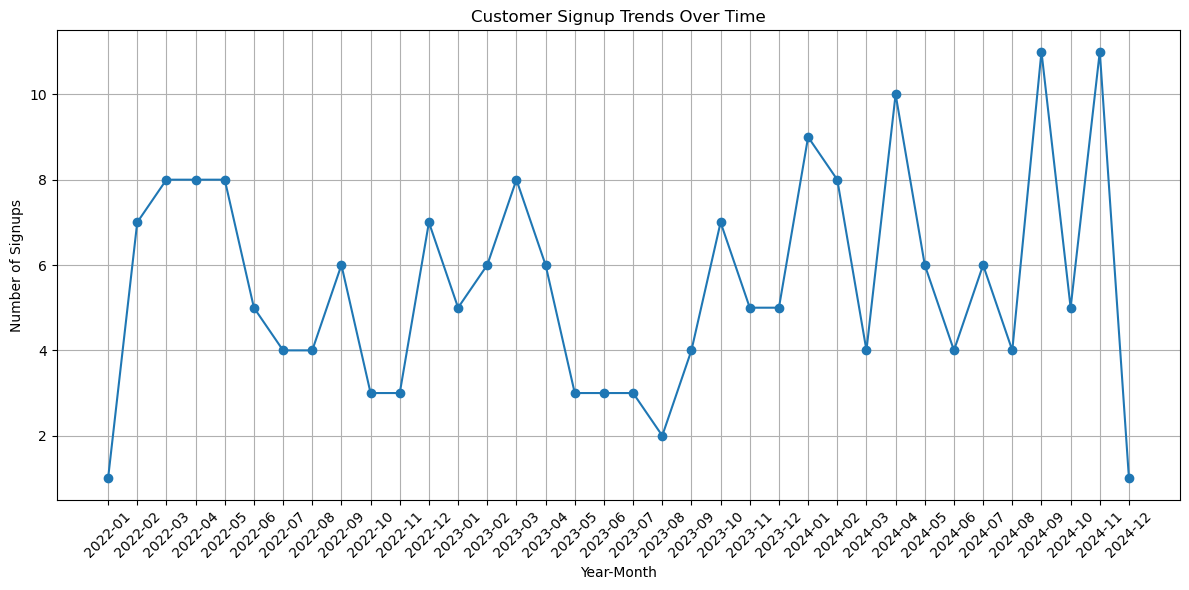

In [24]:
# Customer signup trends over time.
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['YearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('YearMonth').size()
signup_trends = signup_trends.reset_index(name='Signups')
plt.figure(figsize=(12, 6))
plt.plot(signup_trends['YearMonth'].astype(str), signup_trends['Signups'], marker='o')
plt.xticks(rotation=45)
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.grid()
plt.tight_layout()
plt.show()

Correlation between product price and sales quantity: 0.09325056199966723


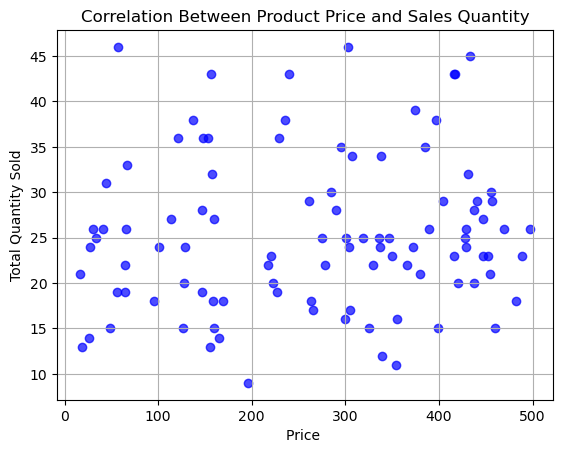

In [35]:
# Correlation between product price and sales quantity.
product_sales = merge_data_PT.groupby('ProductID').agg({
    'Quantity': 'sum',  
    'Price_x': 'first'    
}).reset_index()

correlation = product_sales['Price_x'].corr(product_sales['Quantity'])
print(f"Correlation between product price and sales quantity: {correlation}")
plt.scatter(product_sales['Price_x'], product_sales['Quantity'], alpha=0.7, color='blue')
plt.title('Correlation Between Product Price and Sales Quantity')
plt.xlabel('Price ')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.show()


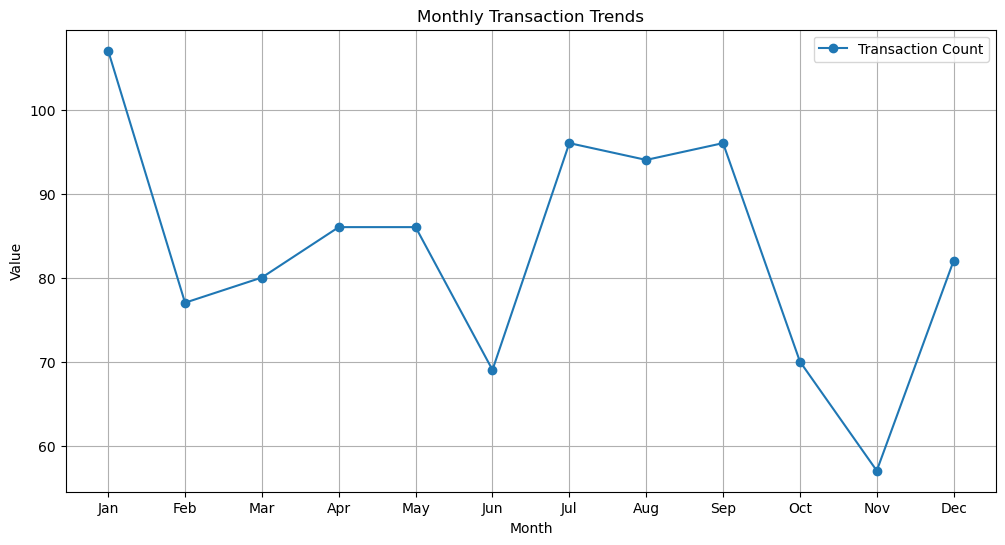

In [41]:
# Seasonal or temporal trends in transactions.
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Day'] = transactions['TransactionDate'].dt.day
monthly_trends = transactions.groupby('Month').agg({
    'TransactionID': 'count',  
    'TotalValue': 'sum'        
}).reset_index()

# Rename columns for clarity
monthly_trends.rename(columns={
    'TransactionID': 'TransactionCount',
    'TotalValue': 'TotalSalesValue'
}, inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['Month'], monthly_trends['TransactionCount'], marker='o', label='Transaction Count')

plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()

### Derive Business Insights

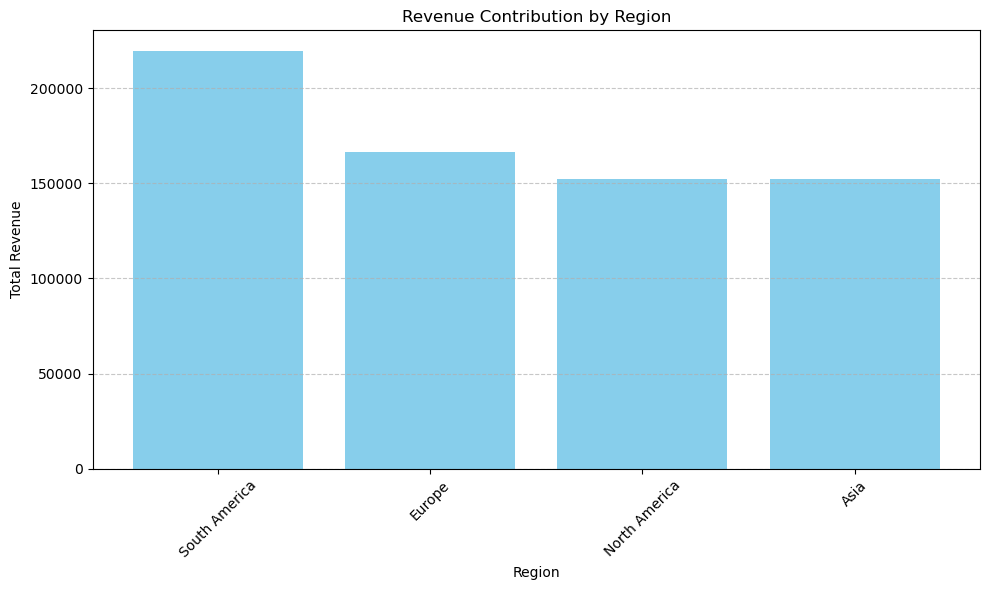

In [43]:
# Identify regions with the highest revenue contribution.
# Group by Region and calculate total revenue
region_revenue = merge_data_CT.groupby('Region').agg({
    'TotalValue': 'sum'
}).reset_index()

region_revenue = region_revenue.sort_values(by='TotalValue', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(region_revenue['Region'], region_revenue['TotalValue'], color='skyblue')
plt.title('Revenue Contribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Total Customers: 199
Repeat Customers: 178 (89.45%)
Two-Time Customers: 9
One-Time Customers: 12 (6.03%)


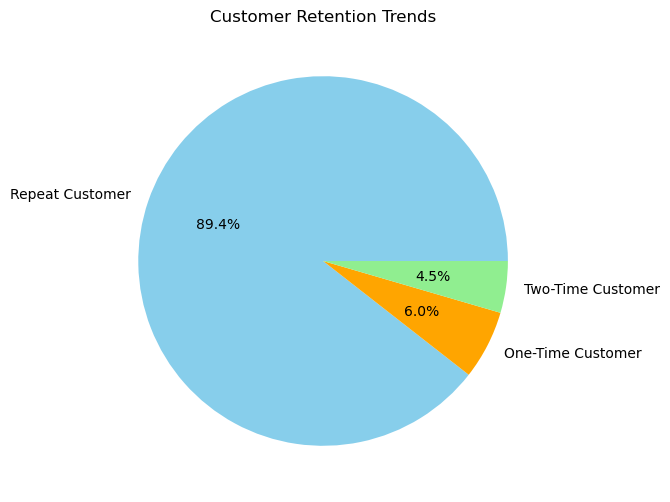

In [53]:
customer_purchases = transactions.groupby('CustomerID').agg({
    'TransactionID': 'count'
}).reset_index()

customer_purchases.rename(columns={'TransactionID': 'PurchaseCount'}, inplace=True)

# Classify customers into repeat, two-time, and one-time buyers
customer_purchases['CustomerType'] = customer_purchases['PurchaseCount'].apply(
    lambda x: 'Repeat Customer' if x > 2 else ('Two-Time Customer' if x == 2 else 'One-Time Customer'))

total_customers = len(customer_purchases)
repeat_customers = len(customer_purchases[customer_purchases['CustomerType'] == 'Repeat Customer'])
two_time_customers = len(customer_purchases[customer_purchases['CustomerType'] == 'Two-Time Customer'])
one_time_customers = len(customer_purchases[customer_purchases['CustomerType'] == 'One-Time Customer'])

repeat_rate = (repeat_customers / total_customers) * 100
churn_rate = (one_time_customers / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Repeat Customers: {repeat_customers} ({repeat_rate:.2f}%)")
print(f"Two-Time Customers: {two_time_customers}")
print(f"One-Time Customers: {one_time_customers} ({churn_rate:.2f}%)")

plt.figure(figsize=(8, 6))
customer_purchases['CustomerType'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Customer Retention Trends')
plt.ylabel('')
plt.show()

High-Value Customers:
    CustomerID  TotalSpending  TransactionCount         CustomerType
3        C0004        5354.88                 8  High-Value Customer
11       C0012        5231.26                 7  High-Value Customer
12       C0013        6000.56                 7  High-Value Customer
20       C0021        5419.92                 8  High-Value Customer
22       C0023        5158.65                 6  High-Value Customer
27       C0028        6819.57                 8  High-Value Customer
40       C0041        6149.78                 7  High-Value Customer
44       C0045        6021.80                 7  High-Value Customer
45       C0046        5627.83                 7  High-Value Customer
50       C0051        5699.57                 7  High-Value Customer
52       C0053        5316.46                 6  High-Value Customer
53       C0054        8040.39                 8  High-Value Customer
58       C0059        7073.28                 8  High-Value Customer
64       C00

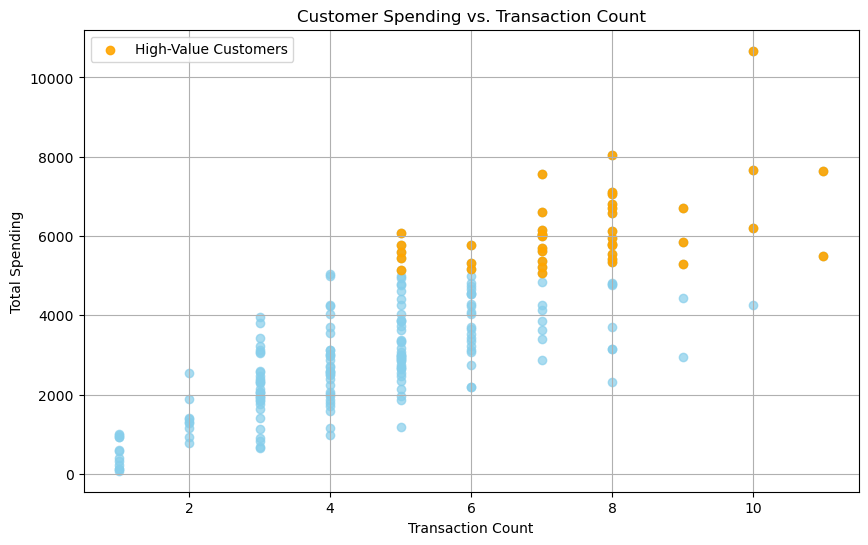

In [54]:
# Pinpoint high-value customers and potential loyalty opportunities.
customer_summary = merge_data_CT.groupby('CustomerID').agg({
    'TotalValue': 'sum', 
    'TransactionID': 'count'  
}).reset_index()
customer_summary.rename(columns={'TotalValue': 'TotalSpending', 'TransactionID': 'TransactionCount'}, inplace=True)

# Define high-value customers (top 20% spenders)
threshold = customer_summary['TotalSpending'].quantile(0.80)
customer_summary['CustomerType'] = customer_summary['TotalSpending'].apply(
    lambda x: 'High-Value Customer' if x >= threshold else 'Regular Customer'
)
high_value_customers = customer_summary[customer_summary['CustomerType'] == 'High-Value Customer']
print("High-Value Customers:")
print(high_value_customers)

plt.figure(figsize=(10, 6))
plt.scatter(customer_summary['TransactionCount'], customer_summary['TotalSpending'], alpha=0.7, c='skyblue')
plt.scatter(
    high_value_customers['TransactionCount'], 
    high_value_customers['TotalSpending'], 
    alpha=0.9, c='orange', label='High-Value Customers'
)
plt.title('Customer Spending vs. Transaction Count')
plt.xlabel('Transaction Count')
plt.ylabel('Total Spending')
plt.grid()
plt.legend()
plt.show()

Category-wise Revenue Distribution:
      Category  TotalValue
0        Books   192147.47
2  Electronics   180783.50
1     Clothing   166170.66
3   Home Decor   150893.93


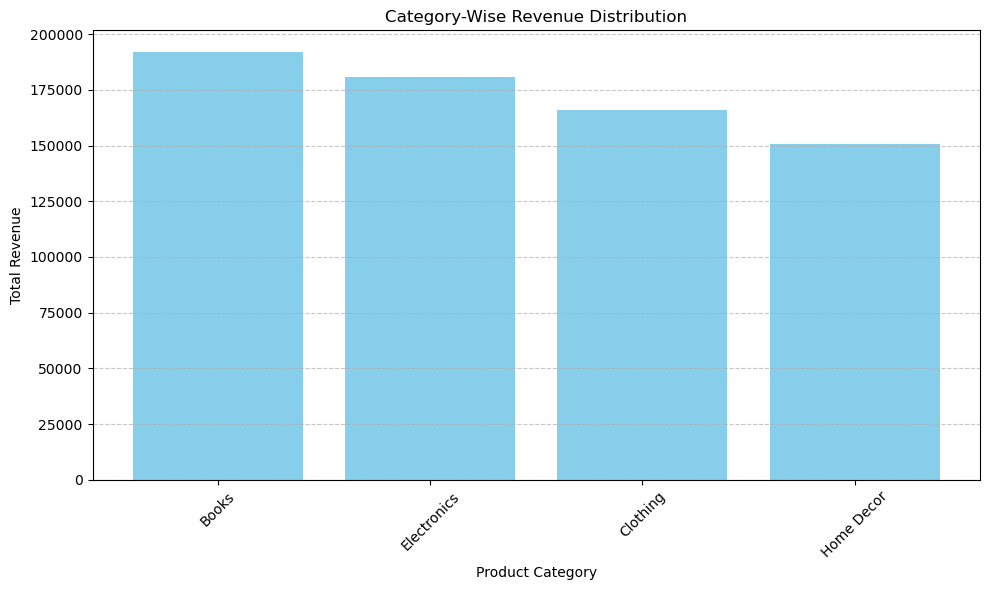

In [55]:
# Analyze category-wise revenue distribution for targeted marketing.
category_revenue = merge_data_PT.groupby('Category').agg({
    'TotalValue': 'sum'
}).reset_index()

# Sort categories by revenue in descending order
category_revenue = category_revenue.sort_values(by='TotalValue', ascending=False)

# Display category-wise revenue
print("Category-wise Revenue Distribution:")
print(category_revenue)

# Plot the revenue distribution by category
plt.figure(figsize=(10, 6))
plt.bar(category_revenue['Category'], category_revenue['TotalValue'], color='skyblue')
plt.title('Category-Wise Revenue Distribution')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
# Find products driving the highest profit margins.
products['Cost'] = products['Price'] * 0.7  # Assuming cost is 70% of price

# Calculate Profit and Profit Margin
products['Profit'] = products['Price'] - products['Cost']
products['ProfitMargin'] = (products['Profit'] / products['Price']) * 100

top_profit_products = products.sort_values(by='ProfitMargin', ascending=False)

print("Products with the Highest Profit Margins:")
print(top_profit_products[['ProductName', 'Price', 'Cost', 'Profit', 'ProfitMargin']])

Products with the Highest Profit Margins:
                ProductName   Price     Cost   Profit  ProfitMargin
24  ActiveWear Cookware Set  284.62  199.234   85.386          30.0
68      BookWorld Biography  100.81   70.567   30.243          30.0
32          TechPro T-Shirt   64.25   44.975   19.275          30.0
28       TechPro Headphones  433.64  303.548  130.092          30.0
67            TechPro Novel  447.23  313.061  134.169          30.0
..                      ...     ...      ...      ...           ...
34       ActiveWear T-Shirt   30.59   21.413    9.177          30.0
27      HomeSense Desk Lamp  235.58  164.906   70.674          30.0
29      ActiveWear Cookbook  277.86  194.502   83.358          30.0
70          TechPro T-Shirt  127.36   89.152   38.208          30.0
99        HomeSense Sweater  126.34   88.438   37.902          30.0

[100 rows x 5 columns]
